In [42]:
import os
import re
import yaml
import pickle

import ipyplot
import pandas as pd


In [77]:
timelines_path = './colour timelines/'
timelines_notebook = 'http://localhost:8888/view/notebooks/8%20-%20timelines/colour%20timelines/'
addresses = os.listdir(timelines_path)
addresses = [ad for ad in addresses if 'png' in ad]
local_addresses = [(timelines_path + addr) for addr in addresses]

In [78]:
with open('../../data/post_test/rankings.pkl', 'rb') as fp:
    rankings = pickle.load(fp)
    id_rankings = {rankings.iloc[i]['username']: rankings.iloc[i]['ranking'] for i in range(len(rankings))}

In [79]:
def get_map(label_map:str) -> dict:
    if label_map == 'vector_labels':
        map_path = '../../data/experiment_keys/permutation_maps/vector_binary.yaml'
        
    with open(map_path) as fp:
        return yaml.load(fp, Loader=yaml.FullLoader)
    
def images_labels(addresses:list, id_rankings:dict, label_map:dict):
    permutation = re.compile('^p([0-9]+)_')
    learner_id = re.compile('_l([A-z0-9]+)_t')
    task = re.compile('_t([0-9]+).')
    
    permutations = []
    learners = []
    labels = []
    tasks = []
    for address in addresses:
        try:
            p = permutation.findall(address)[0]
            permutations.append(p)

            l = learner_id.findall(address)[0]
            learners.append(l)

            labels.append(label_map['map'][p])

            t = task.findall(address)[0]
            tasks.append(t)
        except IndexError:
            permutations.append('missing')

            l = learner_id.findall(address)[0]
            learners.append(l)

            labels.append('none')

            t = task.findall(address)[0]
            tasks.append(t)
        
    return permutations, learners, labels, tasks

In [80]:
label_map = get_map('vector_labels')

In [81]:
permutations, learners, labels, tasks = images_labels(addresses, id_rankings, label_map)

In [84]:
ipyplot.plot_class_tabs(local_addresses, labels, max_imgs_per_tab=10, img_width=700)

In [75]:
from PIL import Image
test = Image.open('./testt.png')

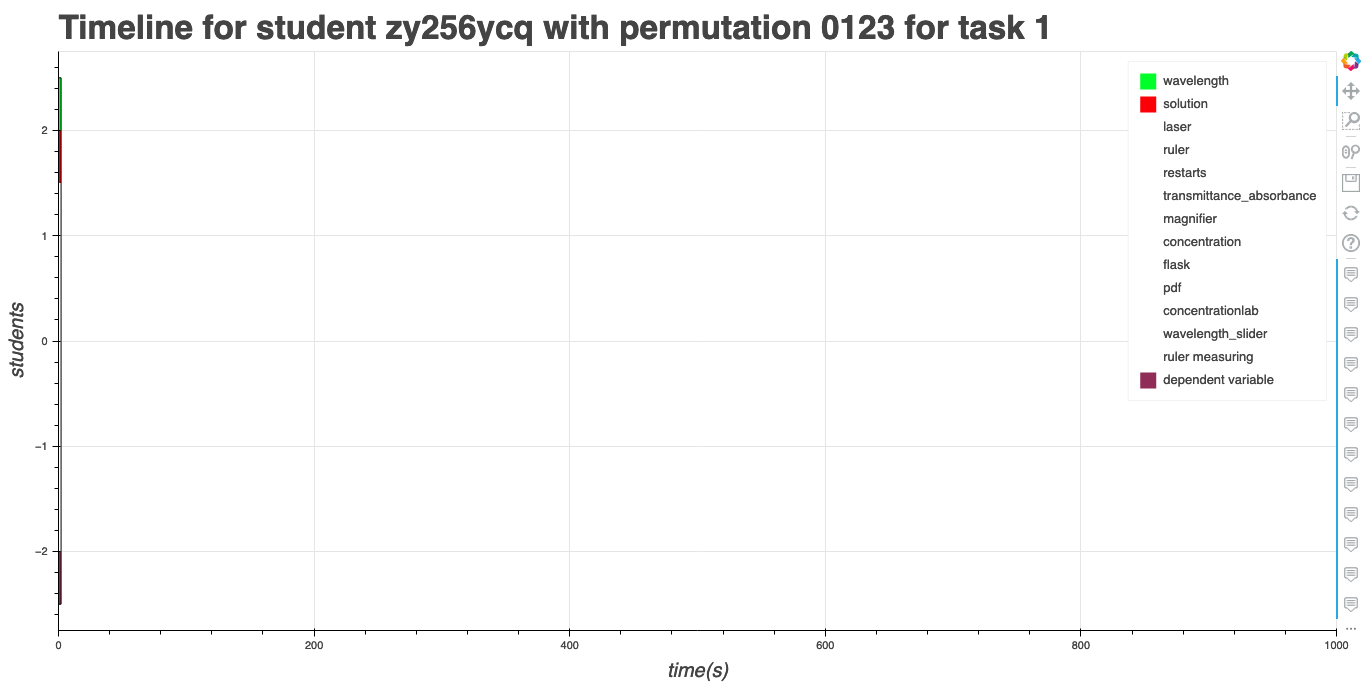

In [76]:
test